This dataset includes information on tree type, shadow coverage, distance to nearby landmarks , soil type, and local topography. As part of the neural network the goal is to predict the type of plant that would grow based on the attributes .

In [ ]:
# Import the relevant library
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/assignment1"

 Bike_Sharing.ipynb   covtype.csv		  Online_shoppers.ipynb
'covdata (2).ipynb'   day.csv
 covdata.ipynb	      online_shoppers_intention


In [ ]:
# Import the data into dataframe
path = "/content/drive/My Drive/Colab Notebooks/assignment1/covtype.csv"
covtype_dataframe = pd.read_csv(path)


In [ ]:
print(covtype_dataframe)

        Elevation  Aspect  ...  Soil_Type_40  Cover_Type (7 types)
0            2590      56  ...             0                     5
1            2804     139  ...             0                     2
2            2785     155  ...             0                     2
3            2595      45  ...             0                     5
4            2579     132  ...             0                     2
5            2606      45  ...             0                     5
6            2605      49  ...             0                     5
7            2617      45  ...             0                     5
8            2612      59  ...             0                     5
9            2612     201  ...             0                     5
10           2886     151  ...             0                     2
11           2742     134  ...             0                     2
12           2609     214  ...             0                     5
13           2503     157  ...             0                  

In [ ]:
# Preprocessing Of data 
covtype_dataframe = covtype_dataframe.set_axis(['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                                                'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points',
               'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type_1',
                'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5',
                'Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11',
                 'Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16',
             'Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22',
              'Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27',
              'Soil_Type_28','Soil_Type_29','Soil_Type_30','Soil_Type_31','Soil_Type_32','Soil_Type_33',
             'Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40', 
                   'Cover_Type (7 types)'
    ], axis=1, inplace=False)


In [ ]:
#Shuffle the data in the dataframe
covtype_dataframe = covtype_dataframe.reindex(np.random.permutation(covtype_dataframe.index))

In [ ]:
covtype_dataframe.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type (7 types)
340775,2815,53,14,127,27,1369,227,208,111,1290,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
395336,3006,159,18,1110,210,2694,236,240,128,1248,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
553783,3188,252,17,120,14,2010,181,249,205,4085,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
238410,3076,63,13,630,-98,1366,231,213,112,947,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
254966,1993,38,21,0,0,212,215,188,99,661,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
def preprocess_features(covtype_dataframe):
  """Prepares input features from  Covtype  data set.

  Args:
    covtype_dataframe: A Pandas DataFrame expected to contain data
      from the covtype   dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  
  #Here we can select all the attributes except the Cover Type which would be our target variable for classification 
  selected_features = covtype_dataframe[
    ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
     'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
     'Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3',
     'Wilderness_Area4','Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5',
     'Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11',
     'Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16',
     'Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22',
     'Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27',
    'Soil_Type_28','Soil_Type_29', 'Soil_Type_30','Soil_Type_31','Soil_Type_32','Soil_Type_33',
    'Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40',
     ]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(covtype_dataframe):
  """

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = covtype_dataframe['Cover_Type (7 types)']
  return output_targets

In [ ]:
# Choose the first 80% examples for training.
covtype_training_examples = preprocess_features(covtype_dataframe.head(464808))
covtype_training_targets = preprocess_targets(covtype_dataframe.head(464808))


# Choose the 20% examples for validation.
covtype_validation_examples = preprocess_features(covtype_dataframe.tail(116203))
covtype_validation_targets = preprocess_targets(covtype_dataframe.tail(116203))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(covtype_training_examples.describe())
print("Validation examples summary:")
display.display(covtype_validation_examples.describe())

print("Training targets summary:")
display.display(covtype_training_targets.describe())
print("Validation targets summary:")
display.display(covtype_validation_targets.describe())





Training examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.00000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000,464808.000000
mean,2959.350713,155.671968,14.113737,269.545554,46.435296,2348.416798,212.147110,223.302615,142.505888,1979.007123,0.448146,0.051548,0.436707,0.063598,0.005217,0.012988,0.008238,0.021364,0.002706,0.011250,0.000181,0.000301,0.002009,0.056432,0.021207,0.051471,0.029995,0.001011,0.000004,0.00483,0.005888,0.003242,0.006921,0.016060,0.001422,0.057518,0.099105,0.036626,0.000858,0.004441,0.001859,0.001693,0.198097,0.052084,0.044324,0.090373,0.078045,0.002754,0.003320,0.000209,0.000518,0.026703,0.023670,0.015064
std,279.991448,111.883600,7.484822,212.507746,58.235213,1558.320365,26.785305,19.776113,38.291611,1322.336556,0.497304,0.221113,0.495978,0.244036,0.072042,0.113223,0.090388,0.144594,0.051954,0.105467,0.013442,0.017353,0.044782,0.230754,0.144073,0.220956,0.170574,0.031783,0.002074,0.06933,0.076510,0.056848,0.082905,0.125708,0.037684,0.232831,0.298804,0.187842,0.029286,0.066489,0.043074,0.041113,0.398566,0.222196,0.205813,0.286715,0.268243,0.052405,0.057521,0.014445,0.022765,0.161216,0.152019,0.121809
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1104.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Validation examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.00000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000
mean,2959.426779,155.597067,14.063664,268.958968,46.353493,2357.081642,212.141726,223.383045,142.617712,1985.390601,0.451735,0.050980,0.433543,0.063742,0.005215,0.012805,0.008554,0.021221,0.002917,0.011583,0.000181,0.000336,0.001833,0.055110,0.021970,0.052038,0.030025,0.00111,0.000009,0.005163,0.005895,0.003373,0.006919,0.015438,0.001523,0.057124,0.100574,0.036608,0.000645,0.004518,0.001910,0.001368,0.199384,0.051298,0.043579,0.090471,0.076401,0.002848,0.002995,0.000189,0.000491,0.027202,0.024130,0.015043
std,279.958251,112.034646,7.501765,212.716890,58.534986,1562.972142,26.708353,19.739031,38.206320,1331.543243,0.497667,0.219957,0.495566,0.244294,0.072027,0.112434,0.092092,0.144123,0.053934,0.107000,0.013442,0.018317,0.042774,0.228197,0.146587,0.222105,0.170657,0.03330,0.002934,0.071671,0.076552,0.057983,0.082892,0.123289,0.038999,0.232081,0.300765,0.187799,0.025397,0.067064,0.043667,0.036965,0.399539,0.220606,0.204157,0.286857,0.265639,0.053295,0.054643,0.013758,0.022142,0.162673,0.153454,0.121723
min,1868.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,120.000000,1022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2997.000000,127.000000,13.000000,218.000000,29.000000,2006.000000,218.000000,226.000000,143.000000,1708.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Training targets summary:


count    464808.000000
mean          2.050434
std           1.395091
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type (7 types), dtype: float64

Validation targets summary:


count    116203.000000
mean          2.055592
std           1.402122
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type (7 types), dtype: float64

In [ ]:
#Normalise the columns for the below attribute so that attributes have the same range of values for each of the inputs
cols_norm = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

In [ ]:
#Use the lambda function to normalise the date .normalization is done to have the same range of values for each of the inputs



covtype_training_examples[cols_norm] =covtype_training_examples[cols_norm].apply(lambda x: (x - x.mean()) / (x.max()-x.mean()))
covtype_validation_examples[cols_norm] = covtype_validation_examples[cols_norm].apply(lambda x: (x - x.mean()) / (x.max()-x.mean()))


#Normalised Value = (Value - Feature Min)/(Feature Max - Feature Min)




In [ ]:
# Implement  a Baseline algorithm first .It is important to establish baseline performance on a 
# modeling problem.
# A baseline provides a point of comparison for the more advanced methods that you evaluate later.
# Below is a function named cov_baseline() that implements this for the classification case.
# The function makes use of the max() function with the key attribute, which is a little clever.
# Given a list of class values observed in the training data, the max() function takes 
#a set of unique class values and calls the count on the list of class values for each class value in the set.
# The result is that it returns the class value that has the highest count of observed
# values in the list of class values observed in the training dataset.
# If all class values have the same count, then we will choose the first class
# value observed in the dataset.
# Once we select a class value, it is used to make a prediction for each row in the test dataset.



In [ ]:
# Create Train and Test set
len(covtype_dataframe)

covTrain = covtype_dataframe[:464808]
covTest = covtype_dataframe[464809:]



In [ ]:

from random import seed
from random import randrange
from collections import Counter
import operator
 
def cov_baseline(train,test):
  output_values =train["Cover_Type (7 types)"].tolist()
  count = Counter(output_values)
  dict_pred = dict(count)
  prediction = max(dict_pred.items(), key=operator.itemgetter(1))[0]
  predicted = [prediction for i in range(len(test))]
  return(predicted)

In [ ]:
# Predict using the baseline implementation on test data
# The accuracy of the baseline is 48%

predicted_class = cov_baseline(covTrain ,covTest)
from sklearn.metrics import confusion_matrix
cm_covbaseline = confusion_matrix(covTest["Cover_Type (7 types)"], predicted_class)
print(cm_covbaseline)
from sklearn.metrics import accuracy_score
accuracy_covbaseline = accuracy_score(predicted_class, covTest["Cover_Type (7 types)"])
print(accuracy_covbaseline)

[[    0 42418     0     0     0     0     0]
 [    0 56415     0     0     0     0     0]
 [    0  7216     0     0     0     0     0]
 [    0   549     0     0     0     0     0]
 [    0  1990     0     0     0     0     0]
 [    0  3476     0     0     0     0     0]
 [    0  4138     0     0     0     0     0]]
0.4854907832911654


In [ ]:
# Dummyclassifier from Sklearn can also be used for Baseline model implementation

# Load libraries

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
X = covtype_dataframe
y = covtype_dataframe["Cover_Type (7 types)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Create dummy classifer
dummy = DummyClassifier(strategy='most_frequent', random_state=1)
# "Train" model
dummy.fit(X_train, y_train)
# Get accuracy score
dummy.score(X_test, y_test) 

# The Accuracy given is almost same as the one for the first baseline implementation.

0.4896517301618719

In [ ]:
# Build neural network model with normalized data
# Using keras , there is a input layer , another layer with 32 neurons and 
# activation function as relu ., The last layer is the output layer with 8 neurons for 
# the output class and using the Softmax function
# ( The Softmax activation takes input as a vector of K real numbers,
# and normalizes it into a probability 
#distribution consisting of K probabilities)
covtype_model = keras.Sequential([
 keras.layers.Flatten(input_shape=(covtype_training_examples.shape[1],)),                 
 
 keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])
'''covtype_model = keras.Sequential([
 keras.layers.Flatten(input_shape=(covtype_training_examples.shape[1],)),                 
 
 keras.layers.Dense(32, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])'''

# Before the model is ready for training, it needs a
# few more settings. These are added during the model's compile step:
# Loss function —This measures how accurate the model is during training.
# We want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees 
# and its loss function.
# Metrics —Used to monitor the training and testing steps. 
# The following example uses accuracy, the fraction of the images that are correctly classified.

covtype_model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
covtype_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 54)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
Total params: 32,328
Trainable params: 32,328
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Train the model 
# Store training stats
covtype_history = covtype_model.fit(covtype_training_examples, covtype_training_targets, epochs=EPOCHS,
                    validation_data= (covtype_validation_examples, covtype_validation_targets), verbose=0,
                    callbacks=[PrintDot()])







..................................................

In [ ]:
# The Accuracy is pretty good at 80% 

covtype_model_results = covtype_model.evaluate(covtype_validation_examples, covtype_validation_targets)

print(covtype_model_results)

116203/116203 [==============================] - 4s 32us/sample - loss: 0.1626 - acc: 0.9379
[0.16264060387801443, 0.9378501]


In [ ]:
#Create a graph of accuracy and loss over time
covtype_history_dict = covtype_history.history
covtype_history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

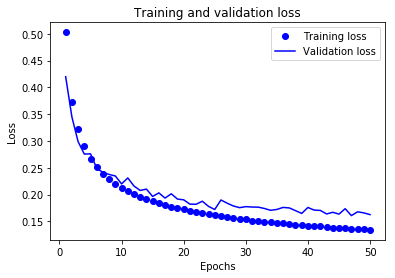

In [ ]:
import matplotlib.pyplot as plt

acc = covtype_history_dict['acc']
val_acc = covtype_history_dict['val_acc']
loss = covtype_history_dict['loss']
val_loss = covtype_history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see that the Validation loss from this model is less than that of the Training loss .at most of the Epocs . This rules out the overfitting problem .There is no generalization gap . We can validate the model is a good fit .

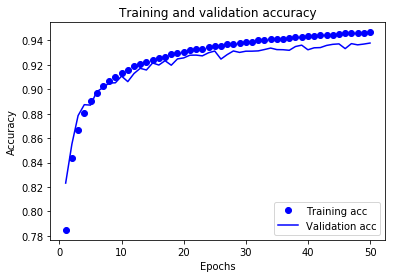

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The accuracy is also good for Validation and the model's accuracy is better than that of the baseline model.